In [194]:
from keras.models import Sequential
from keras import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
# from sklearn.datasets import load_iris,load_digits
# from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [216]:
pd.get_dummies(Y_test).values

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [217]:
(ds_train, ds_test), ds_info  = mnist.load_data()
X_train = x_train.copy()
X_test = x_train.copy()
Y_train = y_train.copy()
Y_test = y_train.copy()
Y_train = pd.get_dummies(Y_test).values
Y_test = pd.get_dummies(Y_test).values

X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255

In [200]:
# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

# ds_train = ds_train.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
# ds_test = ds_test.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.AUTOTUNE)



AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [218]:
model = Sequential() 
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [219]:
mf = model.fit(X_train, Y_train, batch_size=32, epochs=2000, validation_data= (X_test, Y_test), verbose=2)

Epoch 1/2000
1875/1875 - 5s - loss: 0.2800 - accuracy: 0.9164 - val_loss: 0.1328 - val_accuracy: 0.9604 - 5s/epoch - 3ms/step
Epoch 2/2000
1875/1875 - 4s - loss: 0.1246 - accuracy: 0.9622 - val_loss: 0.1159 - val_accuracy: 0.9637 - 4s/epoch - 2ms/step
Epoch 3/2000
1875/1875 - 4s - loss: 0.0929 - accuracy: 0.9716 - val_loss: 0.0629 - val_accuracy: 0.9813 - 4s/epoch - 2ms/step
Epoch 4/2000
1875/1875 - 4s - loss: 0.0742 - accuracy: 0.9770 - val_loss: 0.0559 - val_accuracy: 0.9830 - 4s/epoch - 2ms/step
Epoch 5/2000
1875/1875 - 4s - loss: 0.0608 - accuracy: 0.9808 - val_loss: 0.0482 - val_accuracy: 0.9845 - 4s/epoch - 2ms/step
Epoch 6/2000
1875/1875 - 4s - loss: 0.0515 - accuracy: 0.9833 - val_loss: 0.0439 - val_accuracy: 0.9852 - 4s/epoch - 2ms/step
Epoch 7/2000
1875/1875 - 4s - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.0407 - val_accuracy: 0.9863 - 4s/epoch - 2ms/step
Epoch 8/2000
1875/1875 - 4s - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0325 - val_accuracy: 0.9895 - 4s/epoch - 2

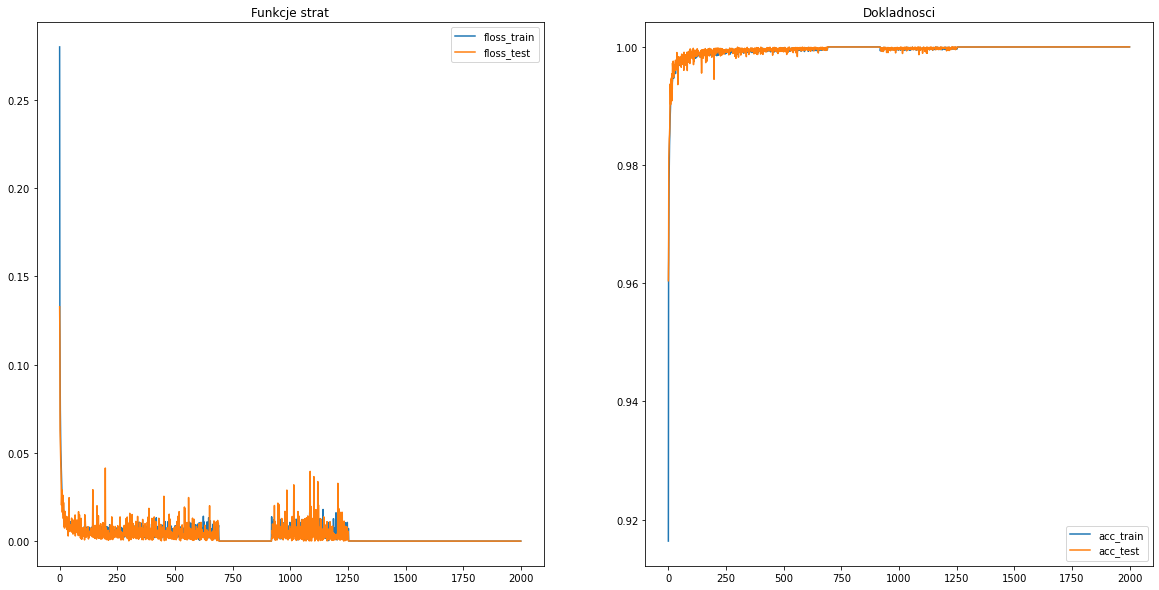

In [220]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 2000)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()
plt.show()

In [221]:

out_put = model.predict(X_test)

1875/1875 [==============================] - 4s 2ms/step


In [222]:
yt=y_test.copy()

In [223]:
a=y_test!=z[6].astype(int)
np.sum(a,axis=1)

<ipython-input-223-8319006ea8ff>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  a=y_test!=z[6].astype(int)


AxisError: axis 1 is out of bounds for array of dimension 0

In [ ]:
z=np.zeros((10,10))
for i in range(10):
    z[i,i]+=1 

for i in range(len(z)):
    mask=y_test!=z[i].astype(int)
    yt[np.sum(mask, axis=1)==0]=i

    

yt[:,1]

array([0, 4, 3, 7, 2, 6, 1, 9, 7, 4, 1, 1, 0, 6, 2, 1, 5, 9, 0, 6, 7, 2,
       2, 7, 9, 1, 1, 6, 1, 9, 6, 7, 3, 1, 6, 9, 0, 8, 7, 1, 8, 3, 7, 3,
       7, 1, 7, 4, 6, 2, 6, 3, 6, 2, 9, 4, 2, 4, 4, 1, 0, 4, 4, 5, 9, 3,
       4, 8, 9, 5, 8, 7, 2, 6, 1, 2, 3, 8, 9, 7, 0, 7, 3, 0, 8, 1, 2, 2,
       6, 4, 8, 5, 1, 4, 7, 3, 5, 9, 9, 4, 5, 2, 7, 5, 6, 2, 0, 5, 2, 6,
       3, 4, 3, 9, 9, 8, 4, 7, 2, 6, 4, 5, 3, 4, 1, 1, 2, 8, 1, 3, 2, 5,
       3, 8, 6, 7, 5, 3, 1, 7, 6, 9, 2, 1, 1, 9, 3, 3, 3, 3, 5, 1, 5, 5,
       4, 7, 7, 8, 8, 8, 1, 6, 6, 9, 5, 3, 4, 6, 3, 8, 4, 7, 1, 8, 0, 9,
       0, 7, 7, 5, 0, 5, 2, 8, 8, 7, 0, 6, 8, 9, 3, 8, 8, 3, 3, 2, 4, 8,
       1, 3, 8, 8, 4, 0, 9, 9, 1, 3, 6, 0, 0, 7, 6, 1, 2, 0, 7, 9, 0, 6,
       5, 1, 7, 5, 6, 0, 0, 0, 4, 4, 6, 6, 9, 7, 1, 7, 3, 3, 5, 8, 3, 4,
       3, 8, 0, 7, 5, 4, 2, 2, 6, 4, 0, 6, 2, 2, 5, 3, 1, 2, 6, 1, 9, 1,
       0, 2, 4, 4, 6, 7, 9, 3, 5, 3, 2, 2, 9, 0, 3, 5, 5, 3, 4, 8, 4, 0,
       7, 0, 4, 2, 3, 5, 7, 8, 7, 6, 1, 2, 2, 8, 6,

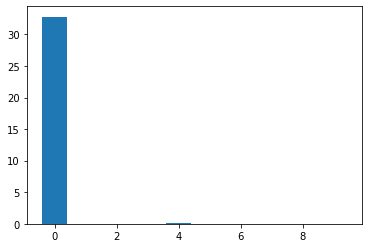

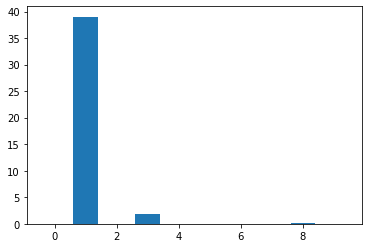

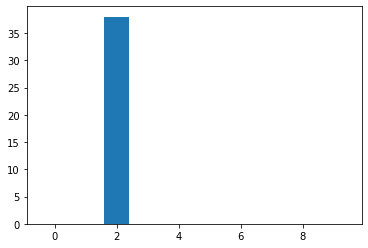

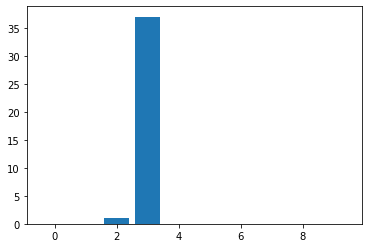

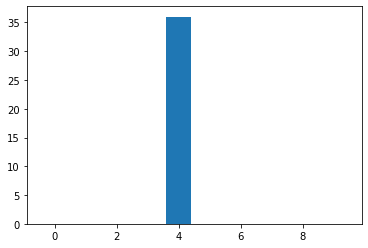

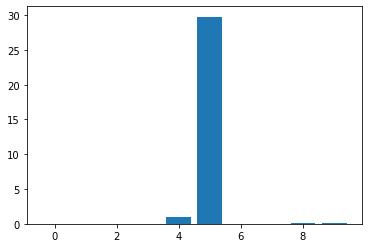

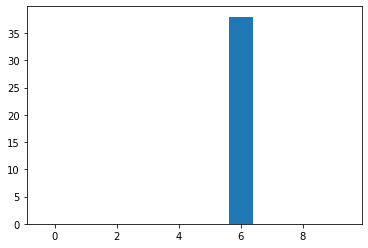

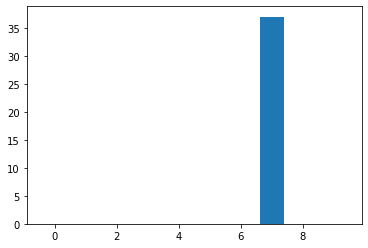

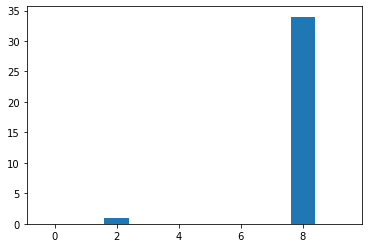

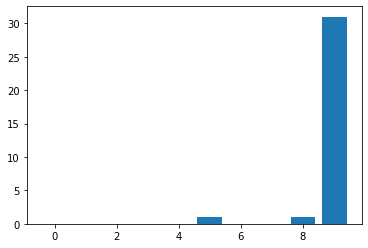

In [ ]:
for i in range(10):
    plt.bar(np.arange(10),np.sum(out_put[yt[:,1]==i], axis=0))
    plt.show()


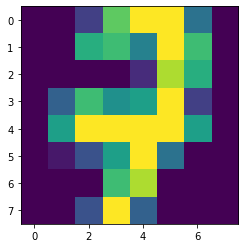

In [ ]:
plt.imshow(X[52].reshape((8,8)))
plt.show()

In [225]:
# model.save('keras_model_neural_network.keras')